In [2]:
import warnings

import joblib
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
%matplotlib inline
warnings.filterwarnings('ignore')



In [15]:
#load your data into the dataframe
my_data = read_csv('crypto_historical_data1.csv')

In [16]:
my_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,symbol,name
0,2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550.0,314.248993,BTC,Bitcoin
1,2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650.0,315.032013,BTC,Bitcoin
2,2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400.0,281.082001,BTC,Bitcoin
3,2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100.0,264.195007,BTC,Bitcoin
4,2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800.0,274.473999,BTC,Bitcoin


In [17]:
print(my_data.shape)

(23978, 9)


In [18]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23978 entries, 0 to 23977
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23978 non-null  object 
 1   High       23978 non-null  float64
 2   Low        23978 non-null  float64
 3   Open       23978 non-null  float64
 4   Close      23978 non-null  float64
 5   Volume     23978 non-null  float64
 6   Adj Close  23978 non-null  float64
 7   symbol     23978 non-null  object 
 8   name       23978 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.6+ MB


In [19]:
my_data['Date'] = pd.to_datetime(my_data['Date'])

In [20]:
# # ordinal encoding-----mapping desired order with a dictionary
# coins_dict= {'BTC':1,'ETH':2,'USDT':3,'BNB':4,'USDC':5,'XRP':6,'SOL':7,'LUNA1':8,'ADA':9,'AVAX':10,'HEX':11,'DOGE':12,'DOT':13,
#           'UST':14,'BUSD':15,'SHIB':16,'WBTC':17,'NEAR':18,'MATIC':19,'CRO':20}
#
#
# # assigning the values
# my_data['symbol'] = my_data.symbol.map(coins_dict)
# my_data

In [21]:
btc=my_data[my_data['symbol']=='BTC']#Extracting the bitcoin data from the dataframe
btc

,Date,High,Low,Open,Close,Volume,Adj Close,symbol,name
0,2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993,BTC,Bitcoin
1,2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013,BTC,Bitcoin
2,2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001,BTC,Bitcoin
3,2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007,BTC,Bitcoin
4,2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999,BTC,Bitcoin
...,...,...,...,...,...,...,...,...,...
2684,2022-05-08,35502.941406,33878.964844,35502.941406,34059.265625,3.676304e+10,34059.265625,BTC,Bitcoin
2685,2022-05-09,34222.074219,30296.953125,34060.015625,30296.953125,6.335549e+10,30296.953125,BTC,Bitcoin
2686,2022-05-10,32596.308594,29944.802734,30273.654297,31022.906250,5.981104e+10,31022.906250,BTC,Bitcoin
2687,2022-05-11,32013.402344,28170.414062,31016.183594,28936.355469,7.038886e+10,28936.355469,BTC,Bitcoin


In [22]:
# my_data['Date'] = pd.to_datetime(my_data['Date'])
# my_data =my_data.set_index('Date')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23978 entries, 0 to 23977
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23978 non-null  datetime64[ns]
 1   High       23978 non-null  float64       
 2   Low        23978 non-null  float64       
 3   Open       23978 non-null  float64       
 4   Close      23978 non-null  float64       
 5   Volume     23978 non-null  float64       
 6   Adj Close  23978 non-null  float64       
 7   symbol     23978 non-null  object        
 8   name       23978 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.6+ MB


In [23]:
#check our data for missing value
my_data = my_data[my_data.isna().any(axis=1)]
print('\n These are the missing data \n', my_data)


 These are the missing data 
 Empty DataFrame
Columns: [Date, High, Low, Open, Close, Volume, Adj Close, symbol, name]
Index: []


In [24]:
btc.head()

,Date,High,Low,Open,Close,Volume,Adj Close,symbol,name
0,2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550.0,314.248993,BTC,Bitcoin
1,2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650.0,315.032013,BTC,Bitcoin
2,2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400.0,281.082001,BTC,Bitcoin
3,2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100.0,264.195007,BTC,Bitcoin
4,2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800.0,274.473999,BTC,Bitcoin


In [25]:
btc = btc.set_index('Date')

In [26]:
print(btc.shape)

(2689, 8)


In [27]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2689 entries, 2015-01-01 to 2022-05-12
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2689 non-null   float64
 1   Low        2689 non-null   float64
 2   Open       2689 non-null   float64
 3   Close      2689 non-null   float64
 4   Volume     2689 non-null   float64
 5   Adj Close  2689 non-null   float64
 6   symbol     2689 non-null   object 
 7   name       2689 non-null   object 
dtypes: float64(6), object(2)
memory usage: 189.1+ KB


In [28]:
btc.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2689.000000,2689.000000,2689.000000,2689.000000,2.689000e+03,2689.000000
mean,12963.245431,12264.168805,12632.122767,12641.200072,1.574259e+10,12641.200072
std,17216.799519,16277.979321,16781.203536,16778.755939,2.013955e+10,16778.755939
min,211.731003,171.509995,176.897003,178.102997,7.860650e+06,178.102997
25%,718.317993,699.903015,709.825012,711.521973,1.109440e+08,711.521973
50%,6789.629883,6542.080078,6647.698242,6652.229980,6.158834e+09,6652.229980
75%,11689.407227,11158.285156,11404.596680,11410.525391,2.642238e+10,11410.525391
max,68789.625000,66382.062500,67549.734375,67566.828125,3.509679e+11,67566.828125


In [29]:
btc.skew()

High         1.589818
Low          1.605313
Open         1.597540
Close        1.595409
Volume       2.959000
Adj Close    1.595409
dtype: float64

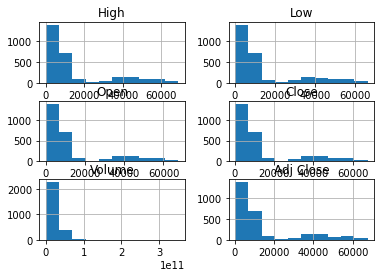

In [30]:
btc.hist()
pyplot.show()

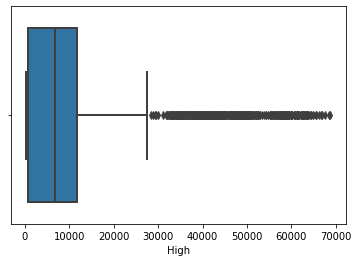

In [31]:
fig = sns.boxplot(data =btc, x= 'High', linewidth=2)

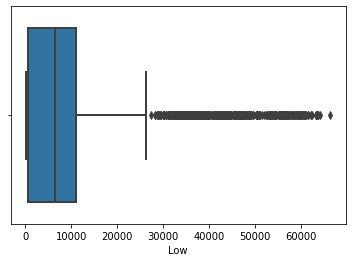

In [32]:
fig = sns.boxplot(data =btc, x= 'Low', linewidth=2)

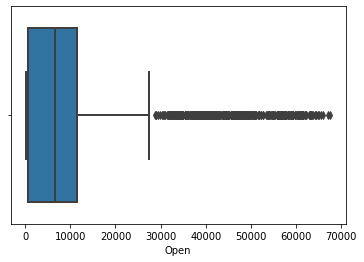

In [33]:
fig = sns.boxplot(data =btc, x= 'Open', linewidth=2)

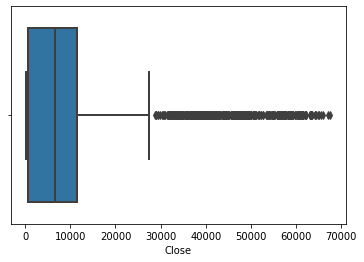

In [34]:
fig = sns.boxplot(data =btc, x= 'Close', linewidth=2)

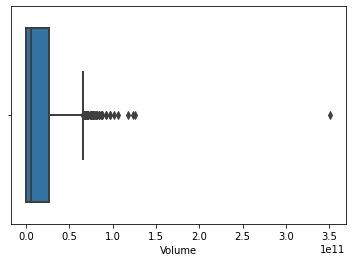

In [35]:
fig = sns.boxplot(data =btc, x= 'Volume', linewidth=2)

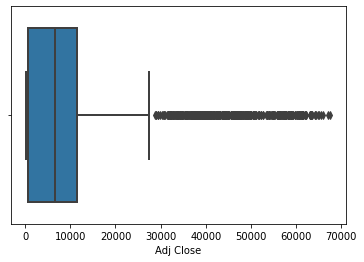

In [36]:
fig = sns.boxplot(data =btc, x= 'Adj Close', linewidth=2)

In [37]:
corrmat = btc.corr()
corrmat

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999035,0.999522,0.999479,0.720341,0.999479
Low,0.999035,1.000000,0.999110,0.999382,0.708163,0.999382
Open,0.999522,0.999110,1.000000,0.998811,0.716367,0.998811
Close,0.999479,0.999382,0.998811,1.000000,0.715282,1.000000
Volume,0.720341,0.708163,0.716367,0.715282,1.000000,0.715282
Adj Close,0.999479,0.999382,0.998811,1.000000,0.715282,1.000000


<AxesSubplot:>

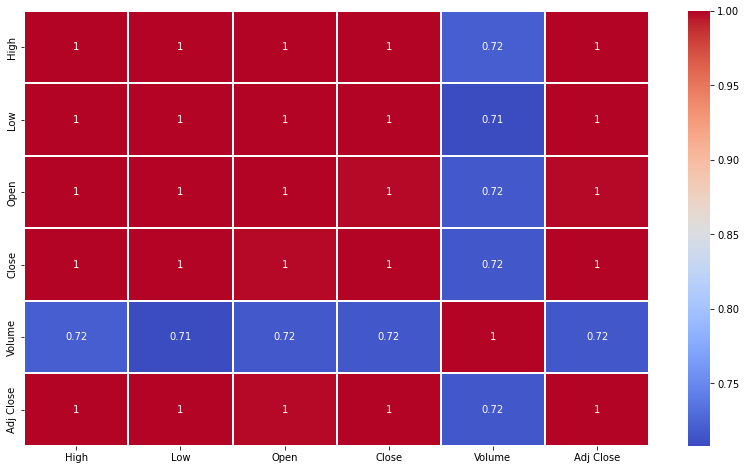

In [38]:
plt.figure(figsize=(14,8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm',linewidth=0.1)

Text(0.5, 0, 'attributes')

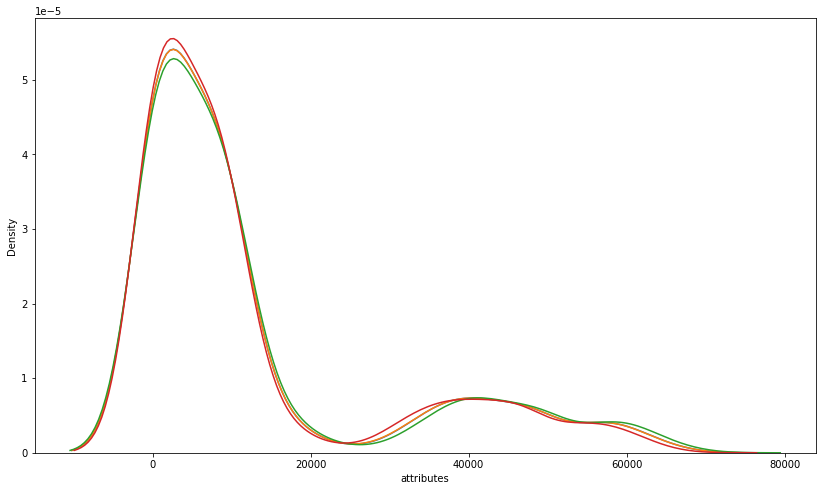

In [39]:
plt.figure(figsize=(14, 8))
fig = sns.kdeplot(btc.Open)
fig = sns.kdeplot(btc.Close)
fig = sns.kdeplot(btc.High)
fig = sns.kdeplot(btc.Low)
# fig = sns.kdeplot(btc.Volume)
# fig = sns.kdeplot(btc['Adj Close'])
plt.xlabel('attributes')

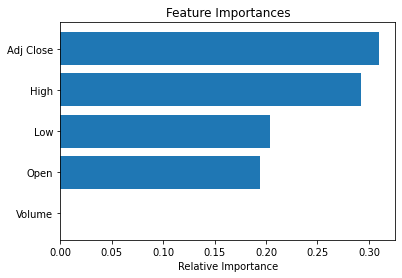

In [40]:
#FEATURE IMPORTANCE
btc =pd.DataFrame(btc)
new_data = btc.drop(['Close', 'symbol', 'name'], axis=1)
rf_model = RandomForestRegressor(random_state=1, max_depth=4) # declaring random forest model
rf_model.fit(new_data, btc.Close)
t_features = new_data.columns
relevance= rf_model.feature_importances_
imp = np.argsort(relevance)[-9:] #Top 10 features
plt.title('Feature Importances')
plt.barh(range(len(imp)), relevance[imp],align='center')
plt.yticks(range(len(imp)), [t_features[i] for i in imp])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
#FORWARD ELIMINATION
new_data= btc.drop(['Close','symbol','name'], axis=1)
ffe = f_regression(new_data,btc.Close)
attribute = []
for i in range(0,len(new_data.columns)-1):
    if ffe[0][i]>=10:
        attribute.append(new_data.columns[i])

print(attribute)

['High', 'Low', 'Open', 'Volume']


ARIMA MODEL

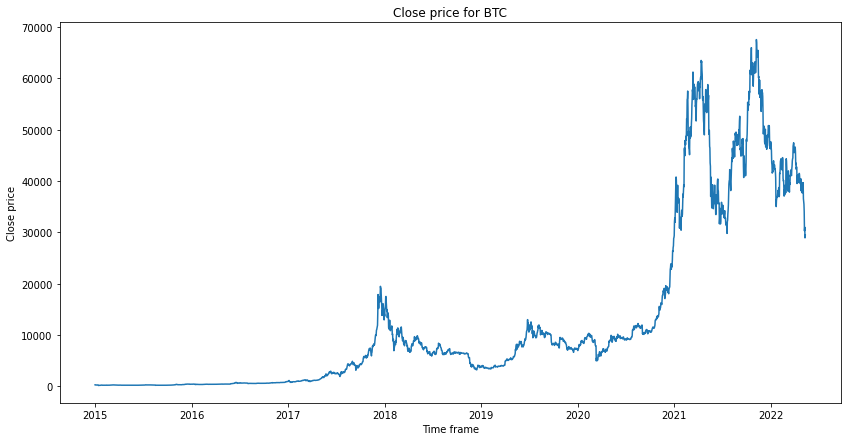

In [42]:
plt.figure(figsize=(14,7))
fig=plt.figure(1)
ax1= fig.add_subplot(111)
ax1.set_xlabel('Time frame')
ax1.set_ylabel('Close price')
ax1.set_title('Close price for BTC')
ax1.plot(btc.Close)

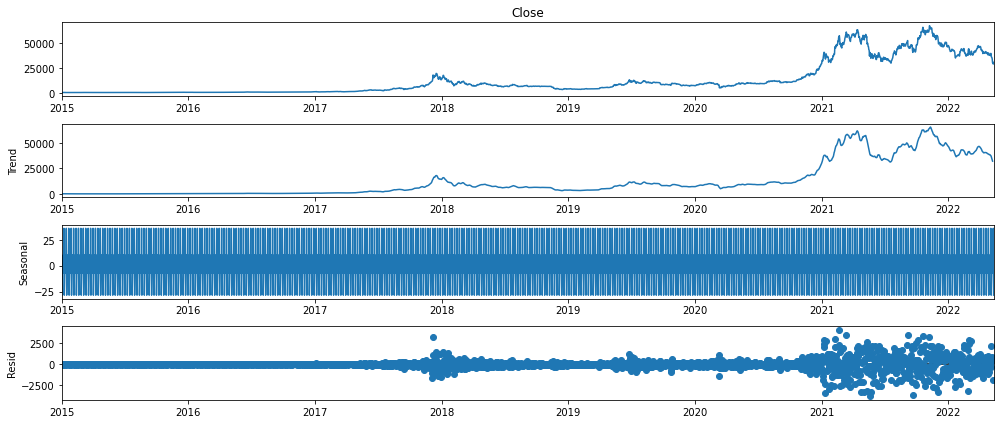

In [43]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(btc['Close'], model='additive')
plt.rcParams["figure.figsize"] = [14,6]
fig = decomposition.plot()

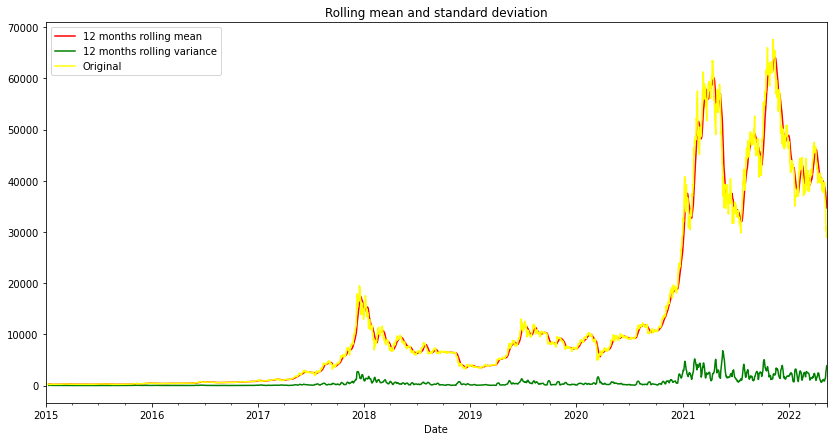

In [44]:
# Checking for stationarity with Rolling statistic method
plt.figure(figsize=(14,7))
btc['Close'].rolling(12).mean().plot(color='red', label='12 months rolling mean')
btc['Close'].rolling(12).std().plot(color='green', label='12 months rolling variance')
btc['Close'].plot(color='yellow', label='Original')
plt.title('Rolling mean and standard deviation')
plt.legend(loc='best')
 # Rolling mean is not constant while std is not.... the data is not stationary

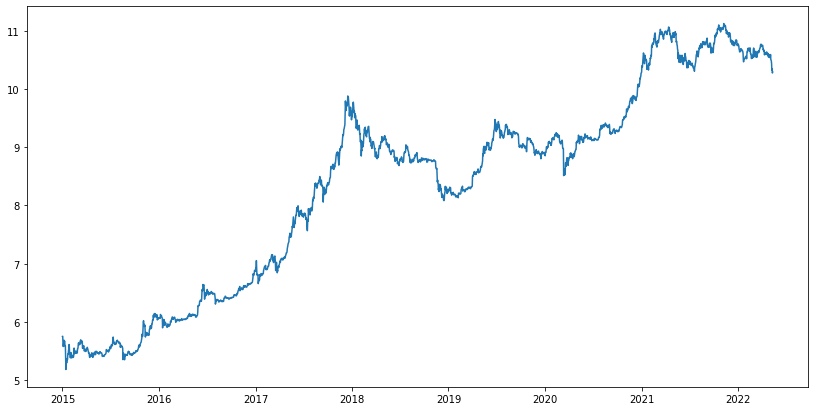

In [45]:
# log transformation
log_btc= np.log(btc['Close'])
plt.figure(figsize=(14,7))
plt.plot(log_btc) #log_btc.plot() # still not stationary

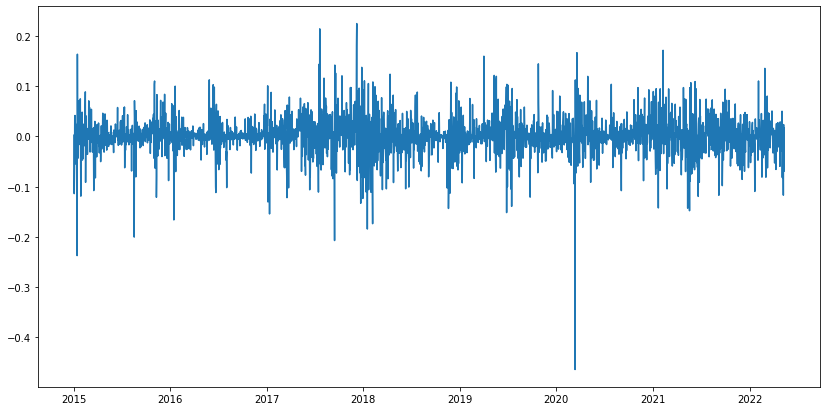

In [46]:
# Trying differentiation to make d series stationary
diff_log_btc = log_btc.diff()
plt.figure(figsize=(14,7))
plt.plot(diff_log_btc)

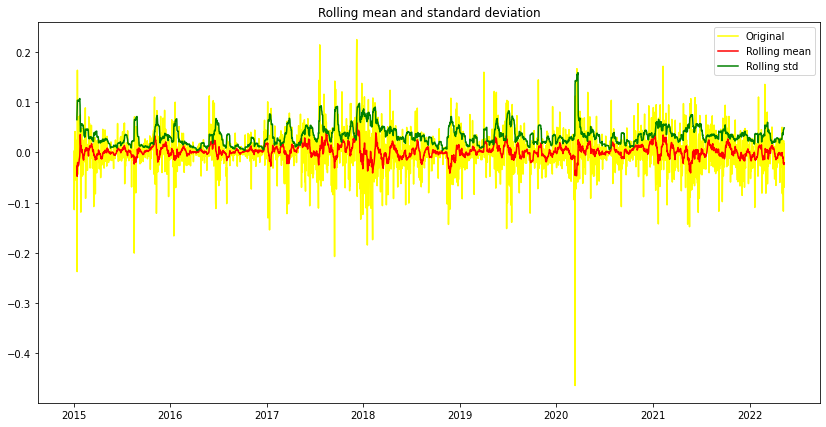

In [47]:
roll_mean= diff_log_btc.rolling(12).mean()
roll_std = diff_log_btc.rolling(12).std()

plt.figure(figsize=(14,7))
orig =plt.plot(diff_log_btc, color='yellow', label='Original')
mean = plt.plot(roll_mean, color='red', label= 'Rolling mean')
std = plt.plot(roll_std,color='green',label= 'Rolling std')
plt.legend(loc='upper right')
plt.title('Rolling mean and standard deviation')
plt.show()

# The series is now statinary with differentiation. then arima can be used(no upward patten in mean and std)

In [48]:
#checking stationarity with adfuller test
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(btc['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.538358
p-value: 0.514458


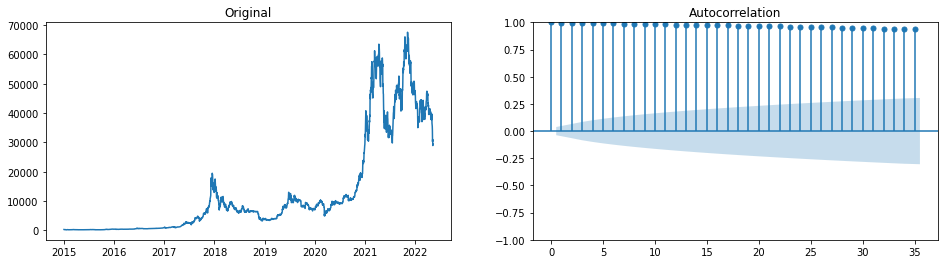

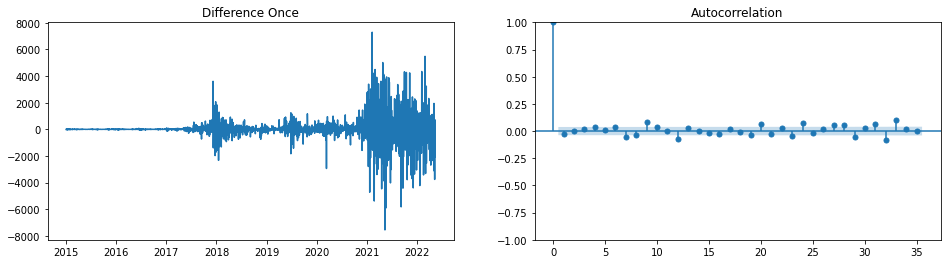

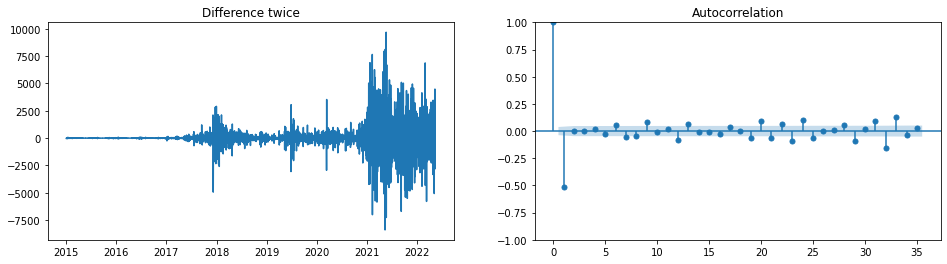

In [49]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(btc['Close'])
ax1.set_title('Original')
plot_acf(btc['Close'], ax=ax2)

# 1st Differencing
diff = btc['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff, ax=ax2)

# 2nd Differencing
diff = btc['Close'].diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference twice')
plot_acf(diff, ax=ax2)
plt.show()

In [50]:
from pmdarima.arima.utils import ndiffs
## Adf Test
ndiffs(btc['Close'], test='adf')  # 2

1

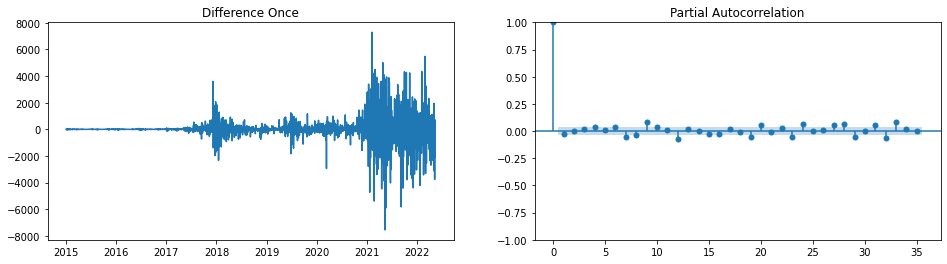

In [51]:
#for p (AR terms) look at pacf plot
diff = btc['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);


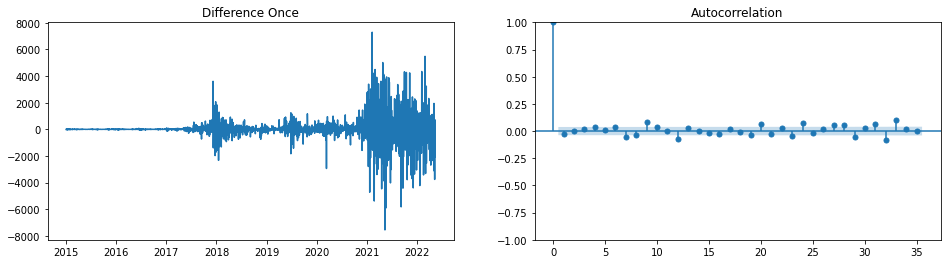

In [52]:
#for q (MA terms) look at acf plot
diff = btc['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

In [54]:
# getting the best order with autoarima
import pmdarima as pm
def arimamodel(series):
    auto = pm.auto_arima(series,
                              starts_p=1, starts_q=1,
                              max_p =10, max_q=10,
                              test='adf', seasonal=True,
                              trace= True)
    return auto

arimamodel(btc['Close'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43673.279, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43673.228, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43673.234, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43671.753, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43675.231, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 13.043 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# 0,1,0 ARIMA Model
model = ARIMA(btc['Close'], order=(0,1,0))
result = model.fit()
print(result.summary())

c:\users\user\desktop\com724\com724\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\user\desktop\com724\com724\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\user\desktop\com724\com724\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2689
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -21834.876
Date:                Thu, 12 May 2022   AIC                          43671.753
Time:                        17:02:52   BIC                          43677.649
Sample:                    01-01-2015   HQIC                         43673.885
                         - 05-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.653e+05   5921.481    112.347      0.000    6.54e+05    6.77e+05
Ljung-Box (L1) (Q):                   2.05   Jarque-Bera (JB):             31564.80
Prob(Q):                              0.15   Pr

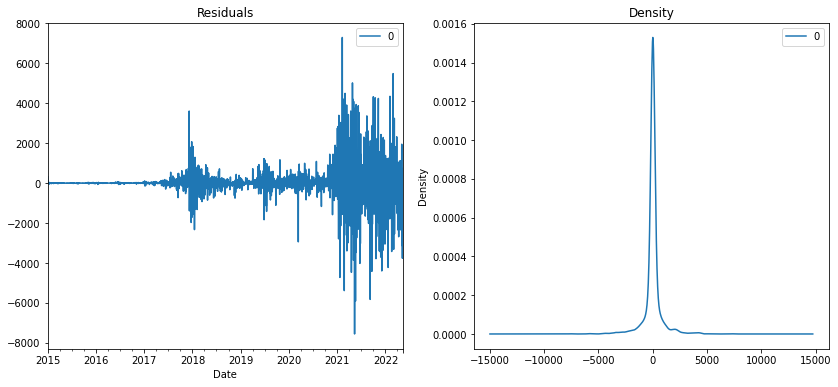

In [56]:
# Plot residual errors to ensure there are no patterns (look for constant mean and variance)
residuals = pd.DataFrame(result.resid)

fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

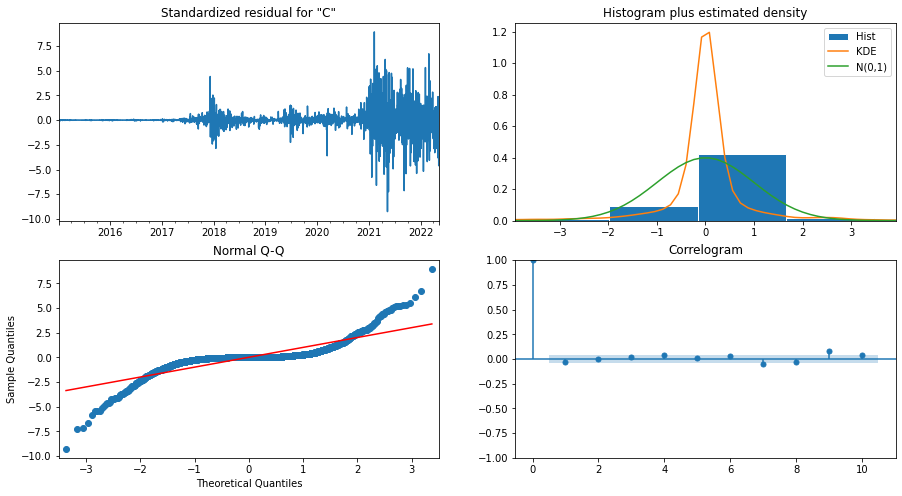

In [57]:
result.plot_diagnostics(figsize=(15,8))
plt.show()

In [58]:
#train test split
n=int(len(btc['Close'])*0.8)
train = btc['Close'][:n]
test = btc['Close'][n:]

print(len(train))
print(len(test))

2151
538


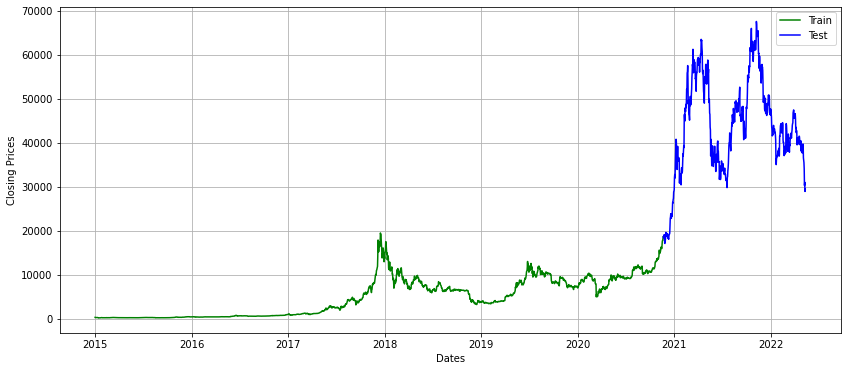

In [59]:
plt.figure(figsize=(14,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train')
plt.plot(test, 'blue', label='Test')
plt.legend()

In [61]:
start=len(train)
end=len(train)+len(test)-1
predictions=result.predict(start=start,end=end, dynamic=False, type='level')
predictions
df = pd.DataFrame({'Actual': test, 'Predicted': predictions})
print(df)

                  Actual     Predicted
2020-11-21  18642.232422  18621.314453
2020-11-22  18370.001953  18642.232422
2020-11-23  18364.121094  18370.001953
2020-11-24  19107.464844  18364.121094
2020-11-25  18732.121094  19107.464844
...                  ...           ...
2022-05-08  34059.265625  35501.953125
2022-05-09  30296.953125  34059.265625
2022-05-10  31022.906250  30296.953125
2022-05-11  28936.355469  31022.906250
2022-05-12  29424.375000  28936.355469

[538 rows x 2 columns]


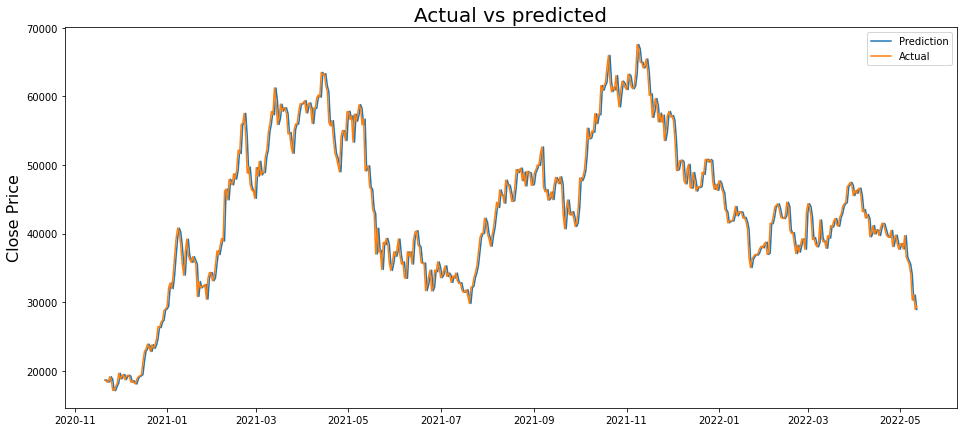

In [62]:
#Plot graph of past and forecast timeseries
plt.figure(figsize=(16,7))
plt.plot(predictions, label="Prediction")
plt.plot(test, label='Actual')
plt.legend(loc='best')
plt.title('Actual vs predicted', fontsize=20)
plt.ylabel('Close Price', fontsize=16)
plt.legend()
plt.show()

In [63]:
#evaluate
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 =  r2_score(test, predictions)
#the r2 for the train dataset
mape = mean_absolute_percentage_error(test, predictions)

#printing the model evaluation values
print('Mean absolute error:, {:.2f}'.format(mae))
print('Mean squared error:, {:.2f}'.format(mse))
print('Root mean squared error:, {:.2f}'.format(rmse))
print('r2 score:{:.2f}'.format(r2))
print('Mean absolute percentage error:, {:.2f}'.format(mape))


Mean absolute error:, 1256.02
Mean squared error:, 2977451.79
Root mean squared error:, 1725.53
r2 score:0.98
Mean absolute percentage error:, 0.03


In [69]:
#saving model to disk
btc_model = 'btc_model.sav'
joblib.dump(model, btc_model)

['btc_model.sav']

In [67]:
# start=len(train)
# end=len(train)+len(test)-1
forecast =result.forecast(steps=7,type='level')
forecast

2022-05-13    29424.375
2022-05-14    29424.375
2022-05-15    29424.375
2022-05-16    29424.375
2022-05-17    29424.375
2022-05-18    29424.375
2022-05-19    29424.375
Freq: D, Name: predicted_mean, dtype: float64

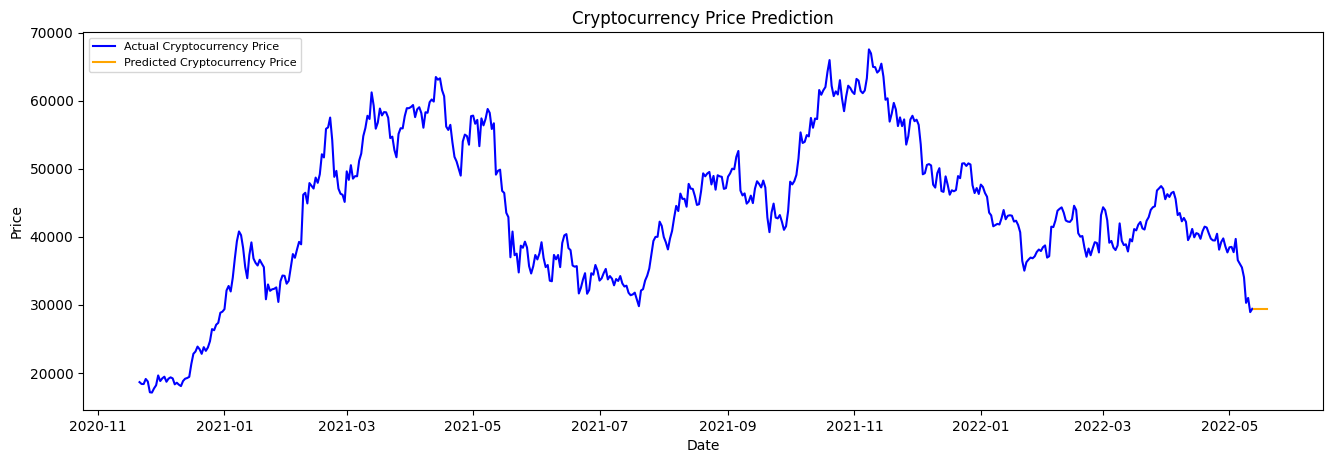

In [68]:
plt.figure(figsize=(16,5), dpi=100)
#plt.plot(train_data, label='training data')
plt.plot(test, color = 'blue', label='Actual Cryptocurrency Price')
plt.plot(forecast, color = 'orange',label='Predicted Cryptocurrency Price')
plt.title('Cryptocurrency Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()